In [2]:
from datetime import datetime, timedelta

import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error as mse

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"]=""

In [4]:
# Importing Time Series Data

# Data by the hour
first_48_data = pd.read_csv('../../../../data/datasets/mimiciv_timeseries/mimiciv_timeseries.csv')


first_48_data.head()

,Unnamed: 0,subject,time(hr),Diastolic blood pressure,Fraction inspired oxygen,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,...,x3_8.0,x3_9.0,x3_nan,x4_Confused,x4_Inappropriate Words,x4_Incomprehensible sounds,x4_No Response,x4_No Response-ETT,x4_Oriented,x4_nan
0,0,11432534_episode1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,11432534_episode1,0.010556,NaN,NaN,NaN,84.0,NaN,NaN,93.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,11432534_episode1,0.027222,42.0,NaN,NaN,84.0,NaN,53.0,93.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,11432534_episode1,0.060556,42.0,NaN,NaN,86.0,NaN,53.0,92.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,11432534_episode1,0.143889,42.0,NaN,NaN,86.0,NaN,53.0,92.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
for idx, row in first_48_data.iterrows():
        
    # Making gcs scores nan where unobserved
    if row['x0_nan'] == 1:
        first_48_data.at[idx, 'x0_0.0'] = np.nan
        first_48_data.at[idx, 'x0_1.0'] = np.nan

    if row['x1_nan'] == 1:
        first_48_data.at[idx, 'x1_None'] = np.nan
        first_48_data.at[idx, 'x1_Spontaneously'] = np.nan
        first_48_data.at[idx, 'x1_To Pain'] = np.nan
        first_48_data.at[idx, 'x1_To Speech'] = np.nan

    if row['x2_nan'] == 1:
        first_48_data.at[idx, 'x2_Abnormal Flexion'] = np.nan
        first_48_data.at[idx, 'x2_Abnormal extension'] = np.nan
        first_48_data.at[idx, 'x2_Flex-withdraws'] = np.nan
        first_48_data.at[idx, 'x2_Localizes Pain'] = np.nan
        first_48_data.at[idx, 'x2_No response'] = np.nan
        first_48_data.at[idx, 'x2_Obeys Commands'] = np.nan

    if row['x3_nan'] == 1:
        first_48_data.at[idx, 'x3_10.0'] = np.nan 
        first_48_data.at[idx, 'x3_11.0'] = np.nan
        first_48_data.at[idx, 'x3_12.0'] = np.nan
        first_48_data.at[idx, 'x3_13.0'] = np.nan
        first_48_data.at[idx, 'x3_14.0'] = np.nan
        first_48_data.at[idx, 'x3_15.0'] = np.nan
        first_48_data.at[idx, 'x3_3.0'] = np.nan
        first_48_data.at[idx, 'x3_4.0'] = np.nan
        first_48_data.at[idx, 'x3_5.0'] = np.nan
        first_48_data.at[idx, 'x3_6.0'] = np.nan
        first_48_data.at[idx, 'x3_7.0'] = np.nan
        first_48_data.at[idx, 'x3_8.0'] = np.nan
        first_48_data.at[idx, 'x3_9.0'] = np.nan


    if row['x4_nan'] == 1:
        first_48_data.at[idx, 'x4_Confused'] = np.nan
        first_48_data.at[idx, 'x4_Inappropriate Words'] = np.nan
        first_48_data.at[idx, 'x4_Incomprehensible sounds'] = np.nan
        first_48_data.at[idx, 'x4_No Response'] = np.nan
        first_48_data.at[idx, 'x4_No Response-ETT'] = np.nan
        first_48_data.at[idx, 'x4_Oriented'] = np.nan
            


In [6]:
first_48_data.head()

,Unnamed: 0,subject,time(hr),Diastolic blood pressure,Fraction inspired oxygen,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,...,x3_8.0,x3_9.0,x3_nan,x4_Confused,x4_Inappropriate Words,x4_Incomprehensible sounds,x4_No Response,x4_No Response-ETT,x4_Oriented,x4_nan
0,0,11432534_episode1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,1,11432534_episode1,0.010556,NaN,NaN,NaN,84.0,NaN,NaN,93.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,2,11432534_episode1,0.027222,42.0,NaN,NaN,84.0,NaN,53.0,93.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,3,11432534_episode1,0.060556,42.0,NaN,NaN,86.0,NaN,53.0,92.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,4,11432534_episode1,0.143889,42.0,NaN,NaN,86.0,NaN,53.0,92.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Reading label data

label_data = pd.read_csv('mimic_iv_label_data.csv')
label_data.head()

,Unnamed: 0,subject,subject_id,episode_num,readmission,length_of_stay,mortality
0,0,11432534_episode1,11432534,1,0.0,7.935417,0
1,1,18664949_episode1,18664949,1,0.0,5.114583,0
2,2,19793183_episode1,19793183,1,0.0,20.467361,0
3,3,15687156_episode1,15687156,1,0.0,0.098611,1
4,4,14504982_episode1,14504982,1,0.0,9.854167,0


In [8]:
# Reading patient clusters

patient_clusters = pd.read_csv('mimic_iv_patient_clusters.csv')
patient_clusters.head()

,Unnamed: 0,subject_id,cluster
0,0,10000032,1
1,1,10000980,1
2,2,10001217,1
3,3,10001725,1
4,4,10002013,1


In [9]:
# adding column for subject_id and episode_num

subject_w_ep = first_48_data['subject']

subject_ids = subject_w_ep.apply(lambda x: int(x.split('_')[0]))
episode_nums = subject_w_ep.apply(lambda x: int(x.split('_')[1][7:]))

In [10]:
first_48_data['subject_id'] = subject_ids
first_48_data['episode_num'] = episode_nums

first_48_data.head()

,Unnamed: 0,subject,time(hr),Diastolic blood pressure,Fraction inspired oxygen,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,...,x3_nan,x4_Confused,x4_Inappropriate Words,x4_Incomprehensible sounds,x4_No Response,x4_No Response-ETT,x4_Oriented,x4_nan,subject_id,episode_num
0,0,11432534_episode1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,11432534,1
1,1,11432534_episode1,0.010556,NaN,NaN,NaN,84.0,NaN,NaN,93.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,11432534,1
2,2,11432534_episode1,0.027222,42.0,NaN,NaN,84.0,NaN,53.0,93.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,11432534,1
3,3,11432534_episode1,0.060556,42.0,NaN,NaN,86.0,NaN,53.0,92.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,11432534,1
4,4,11432534_episode1,0.143889,42.0,NaN,NaN,86.0,NaN,53.0,92.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11432534,1


In [11]:
first_48_data.rename(columns={"time(hr)": "Hours"}, inplace=True)

In [12]:
# Merging data with labels and cluster to get correct sample

first_48_data = first_48_data.merge(label_data, on=['subject', 'subject_id', 'episode_num'])
first_48_data = first_48_data.merge(patient_clusters, on='subject_id')

first_48_data.head()

,Unnamed: 0_x,subject,Hours,Diastolic blood pressure,Fraction inspired oxygen,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,...,x4_Oriented,x4_nan,subject_id,episode_num,Unnamed: 0_y,readmission,length_of_stay,mortality,Unnamed: 0,cluster
0,0,11432534_episode1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,11432534,1,0,0.0,7.935417,0,3710,1
1,1,11432534_episode1,0.010556,NaN,NaN,NaN,84.0,NaN,NaN,93.0,...,NaN,1.0,11432534,1,0,0.0,7.935417,0,3710,1
2,2,11432534_episode1,0.027222,42.0,NaN,NaN,84.0,NaN,53.0,93.0,...,NaN,1.0,11432534,1,0,0.0,7.935417,0,3710,1
3,3,11432534_episode1,0.060556,42.0,NaN,NaN,86.0,NaN,53.0,92.0,...,NaN,1.0,11432534,1,0,0.0,7.935417,0,3710,1
4,4,11432534_episode1,0.143889,42.0,NaN,NaN,86.0,NaN,53.0,92.0,...,0.0,0.0,11432534,1,0,0.0,7.935417,0,3710,1


In [13]:
print(len(first_48_data.groupby('subject')))

31489


In [14]:
print(first_48_data.columns)

Index(['Unnamed: 0_x', 'subject', 'Hours', 'Diastolic blood pressure',
       'Fraction inspired oxygen', 'Glucose', 'Heart Rate', 'Height',
       'Mean blood pressure', 'Oxygen saturation', 'Respiratory rate',
       'Systolic blood pressure', 'Temperature', 'Weight', 'pH', 'x0_0.0',
       'x0_1.0', 'x0_nan', 'x1_None', 'x1_Spontaneously', 'x1_To Pain',
       'x1_To Speech', 'x1_nan', 'x2_Abnormal Flexion',
       'x2_Abnormal extension', 'x2_Flex-withdraws', 'x2_Localizes Pain',
       'x2_No response', 'x2_Obeys Commands', 'x2_nan', 'x3_10.0', 'x3_11.0',
       'x3_12.0', 'x3_13.0', 'x3_14.0', 'x3_15.0', 'x3_3.0', 'x3_4.0',
       'x3_5.0', 'x3_6.0', 'x3_7.0', 'x3_8.0', 'x3_9.0', 'x3_nan',
       'x4_Confused', 'x4_Inappropriate Words', 'x4_Incomprehensible sounds',
       'x4_No Response', 'x4_No Response-ETT', 'x4_Oriented', 'x4_nan',
       'subject_id', 'episode_num', 'Unnamed: 0_y', 'readmission',
       'length_of_stay', 'mortality', 'Unnamed: 0', 'cluster'],
      dtype='o

In [15]:
# keeping 'Unnamed: 0_x' and renaming to 'original_idx' to retain original indexes
first_48_data = first_48_data.drop(columns=['Unnamed: 0_y', 'Unnamed: 0'])

first_48_data = first_48_data.rename(columns={'Unnamed: 0_x': 'original_idx'})

In [16]:
print(first_48_data.columns)

Index(['original_idx', 'subject', 'Hours', 'Diastolic blood pressure',
       'Fraction inspired oxygen', 'Glucose', 'Heart Rate', 'Height',
       'Mean blood pressure', 'Oxygen saturation', 'Respiratory rate',
       'Systolic blood pressure', 'Temperature', 'Weight', 'pH', 'x0_0.0',
       'x0_1.0', 'x0_nan', 'x1_None', 'x1_Spontaneously', 'x1_To Pain',
       'x1_To Speech', 'x1_nan', 'x2_Abnormal Flexion',
       'x2_Abnormal extension', 'x2_Flex-withdraws', 'x2_Localizes Pain',
       'x2_No response', 'x2_Obeys Commands', 'x2_nan', 'x3_10.0', 'x3_11.0',
       'x3_12.0', 'x3_13.0', 'x3_14.0', 'x3_15.0', 'x3_3.0', 'x3_4.0',
       'x3_5.0', 'x3_6.0', 'x3_7.0', 'x3_8.0', 'x3_9.0', 'x3_nan',
       'x4_Confused', 'x4_Inappropriate Words', 'x4_Incomprehensible sounds',
       'x4_No Response', 'x4_No Response-ETT', 'x4_Oriented', 'x4_nan',
       'subject_id', 'episode_num', 'readmission', 'length_of_stay',
       'mortality', 'cluster'],
      dtype='object')


In [17]:
print(first_48_data.columns[3:-6])

Index(['Diastolic blood pressure', 'Fraction inspired oxygen', 'Glucose',
       'Heart Rate', 'Height', 'Mean blood pressure', 'Oxygen saturation',
       'Respiratory rate', 'Systolic blood pressure', 'Temperature', 'Weight',
       'pH', 'x0_0.0', 'x0_1.0', 'x0_nan', 'x1_None', 'x1_Spontaneously',
       'x1_To Pain', 'x1_To Speech', 'x1_nan', 'x2_Abnormal Flexion',
       'x2_Abnormal extension', 'x2_Flex-withdraws', 'x2_Localizes Pain',
       'x2_No response', 'x2_Obeys Commands', 'x2_nan', 'x3_10.0', 'x3_11.0',
       'x3_12.0', 'x3_13.0', 'x3_14.0', 'x3_15.0', 'x3_3.0', 'x3_4.0',
       'x3_5.0', 'x3_6.0', 'x3_7.0', 'x3_8.0', 'x3_9.0', 'x3_nan',
       'x4_Confused', 'x4_Inappropriate Words', 'x4_Incomprehensible sounds',
       'x4_No Response', 'x4_No Response-ETT', 'x4_Oriented', 'x4_nan'],
      dtype='object')


In [18]:
first_48_data.head()

,original_idx,subject,Hours,Diastolic blood pressure,Fraction inspired oxygen,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,...,x4_No Response,x4_No Response-ETT,x4_Oriented,x4_nan,subject_id,episode_num,readmission,length_of_stay,mortality,cluster
0,0,11432534_episode1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,11432534,1,0.0,7.935417,0,1
1,1,11432534_episode1,0.010556,NaN,NaN,NaN,84.0,NaN,NaN,93.0,...,NaN,NaN,NaN,1.0,11432534,1,0.0,7.935417,0,1
2,2,11432534_episode1,0.027222,42.0,NaN,NaN,84.0,NaN,53.0,93.0,...,NaN,NaN,NaN,1.0,11432534,1,0.0,7.935417,0,1
3,3,11432534_episode1,0.060556,42.0,NaN,NaN,86.0,NaN,53.0,92.0,...,NaN,NaN,NaN,1.0,11432534,1,0.0,7.935417,0,1
4,4,11432534_episode1,0.143889,42.0,NaN,NaN,86.0,NaN,53.0,92.0,...,0.0,0.0,0.0,0.0,11432534,1,0.0,7.935417,0,1


In [19]:
# Grouping by admission

data = first_48_data.groupby('subject')
print(len(data))

31489


In [20]:
i = 0  

subjects = []
subject_idx = []
readm_label = []
mortality_label = []
los_label = []
cluster = []


for group_idx, group_rows in data:  
    
    subjects.append(group_idx)
    subject_idx.append(i)
    
    readm_label.append(group_rows['readmission'].values[0])
    mortality_label.append(group_rows['mortality'].values[0])
    los_label.append(group_rows['length_of_stay'].values[0])
    cluster.append(group_rows['cluster'].values[0])
    
    
    
    # stores totals for variables
    cur_matrix = np.empty([48, 48])
    cur_matrix[:] = np.nan

    # stores counts for variables
    cur_counts = np.empty([48, 48])
    cur_counts[:] = np.nan

    cur_columns = group_rows.columns.values.tolist()
    feature_columns = cur_columns[3:-6]

    j = 0
    for idx, row in group_rows.iterrows():
        
            
        # Modifying cur_data to have data by the hour for 48 hours
        if row['Hours'] < j+1 and j < 48:
            for k in range(len(feature_columns)):
                if not (np.isnan(group_rows.loc[idx, feature_columns[k]])):
                    if np.isnan(cur_matrix[j, k]):
                        cur_matrix[j, k] = group_rows.loc[idx, feature_columns[k]]
                        cur_counts[j, k] = 1
                    else:
                        cur_matrix[j, k] += group_rows.loc[idx, feature_columns[k]]
                        cur_counts[j, k] += 1
                        
        else:
            if j >= 48:
                break
            else:
                j += 1
                

    # Getting time series data

    X_element = np.divide(cur_matrix, cur_counts)

    if i == 0:

        # Holds all of the multivariate time series
        X = np.array([X_element])

    else:
        X = np.concatenate((X, np.array([X_element])))
    
    i += 1
    

In [21]:
print(X.shape)

(31489, 48, 48)


In [22]:
y = pd.DataFrame({'subject':subjects, 'subject_idx':subject_idx, 'readmission':readm_label, 'mortality':mortality_label,
                  'length_of_stay':los_label, 'cluster':cluster})
subjects = []
subject_idx = []
readm_label = []
mortality_label = []
los_label = []
cluster = []

print(y.shape)
y.head()

(31489, 6)


,subject,subject_idx,readmission,mortality,length_of_stay,cluster
0,10000032_episode1,0,0.0,0,2.222222,1
1,10000980_episode1,1,0.0,0,5.806944,1
2,10001217_episode1,2,1.0,0,6.794444,1
3,10001217_episode2,3,NaN,0,5.914583,1
4,10001725_episode1,4,0.0,0,2.994444,1


In [23]:
from sklearn.model_selection import train_test_split

random_seed = 33

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)


In [24]:
from sklearn import preprocessing

# Standardizing the data

scalers = {}
for i in range(X_train.shape[2]):
    scalers[i] = preprocessing.StandardScaler()
    X_train[:, :, i] = scalers[i].fit_transform(X_train[:, :, i]) 

for i in range(X_test.shape[2]):
    X_test[:, :, i] = scalers[i].transform(X_test[:, :, i]) 

for i in range(X.shape[2]):
    X[:, :, i] = scalers[i].transform(X[:, :, i]) 

    

In [25]:
from sklearn.impute import SimpleImputer


print(X.shape)

all_feature_means = []

# Reshaping to 2-dimensional data for imputation
X_2d = np.reshape(X, (X.shape[0]*X.shape[1], X.shape[2]))


mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
mean_imputer.fit(X_2d)
X_2d = mean_imputer.transform(X_2d)


for i in range(X_2d.shape[1]):
    all_feature_means.append(np.mean(X_2d[:][i]))



print(all_feature_means)

(31489, 48, 48)
[0.20036582976204423, 0.17775456930207437, 0.12269121668293394, 0.17775456930207437, 0.019168285216680847, 0.17775456930207437, 0.17775456930207437, 0.08130735198117317, 0.17775456930207437, 0.17775456930207437, 0.17775456930207437, 0.17775456930207437, 0.17775456930207437, 0.17775456930207437, 0.17775456930207437, 0.17775456930207437, 0.17775456930207437, 0.17775456930207437, 0.17775456930207437, 0.17775456930207437, 0.17775456930207437, 0.17775456930207437, 0.17775456930207437, 0.17775456930207437, 0.17775456930207437, 0.17775456930207437, 0.17775456930207437, 0.17775456930207437, 0.17775456930207437, 0.17775456930207437, 0.17775456930207437, 0.17775456930207437, 0.17775456930207437, 0.17775456930207437, 0.17775456930207437, 0.17775456930207437, 0.17775456930207437, 0.17775456930207437, 0.17775456930207437, 0.17775456930207437, 0.17775456930207437, 0.17775456930207437, 0.17775456930207437, 0.17775456930207437, 0.17775456930207437, 0.17775456930207437, 0.17775456930207

In [26]:



print(X.shape)

train_feature_means = []

# Reshaping to 2-dimensional data for imputation
X_train_2d = np.reshape(X_train, (X_train.shape[0]*X_train.shape[1], X_train.shape[2]))


train_mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
train_mean_imputer.fit(X_train_2d)
X_train_2d = train_mean_imputer.transform(X_train_2d)


for i in range(X_train_2d.shape[1]):
    train_feature_means.append(np.mean(X_train_2d[:][i]))



print(train_feature_means)

(31489, 48, 48)
[0.09987920279910383, -5.561317025005966e-16, -5.561317025005966e-16, -5.561317025005966e-16, 0.3625940492800348, 0.4566171176093376, -0.026951689326147627, -0.11808901157400302, -0.07199669000259247, -5.561317025005966e-16, -5.561317025005966e-16, -0.027816122495181478, -5.561317025005966e-16, -0.03771542601618285, -5.561317025005966e-16, -5.561317025005966e-16, -5.561317025005966e-16, -5.561317025005966e-16, -5.561317025005966e-16, -5.561317025005966e-16, -5.561317025005966e-16, -5.561317025005966e-16, -5.561317025005966e-16, -5.561317025005966e-16, -5.561317025005966e-16, -0.0517255267568309, -5.561317025005966e-16, -5.561317025005966e-16, -5.561317025005966e-16, -5.561317025005966e-16, -0.05797858027354016, -0.037948085096949545, -5.561317025005966e-16, -5.561317025005966e-16, -5.561317025005966e-16, -5.561317025005966e-16, -5.561317025005966e-16, -5.561317025005966e-16, -5.561317025005966e-16, -0.0373495700991753, -5.561317025005966e-16, 0.0011522622218144013, -0.1

In [27]:
from sklearn.impute import SimpleImputer


print(X.shape)

test_feature_means = []

# Reshaping to 2-dimensional data for imputation
X_test_2d = np.reshape(X_test, (X_test.shape[0]*X_test.shape[1], X_test.shape[2]))


test_mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
test_mean_imputer.fit(X_test_2d)
X_test_2d = test_mean_imputer.transform(X_test_2d)


for i in range(X_test_2d.shape[1]):
    test_feature_means.append(np.mean(X_test_2d[:][i]))



print(test_feature_means)

(31489, 48, 48)
[0.1030028290570371, 0.8772903210129748, 0.8772903210129748, 0.8772903210129748, 0.24883296789872858, 0.36238176622895285, -0.12539406351832436, -0.10990306785139915, -0.10842122798852537, -0.07174711163129376, 0.016609368340701185, 0.0654413884834812, 0.053703900653218097, 0.8772903210129748, -0.032617594906144014, 0.011494253958953267, 0.014764003867121742, -0.01673144230310153, 0.8772903210129748, -0.025311304149835765, -0.006946143768683178, 0.8772903210129748, 0.8772903210129748, 0.1387755349024727, 0.8772903210129748, 0.8772903210129748, 0.8772903210129748, -0.061612438423388184, -0.07264972143415817, -0.08039203564601172, 0.8772903210129748, 0.8772903210129748, 0.8772903210129748, 0.8772903210129748, -0.06493351645073649, 0.8772903210129748, -0.013698942651471474, 0.8772903210129748, 0.8772903210129748, 0.8772903210129748, -0.07014096988932718, 0.8772903210129748, 0.8772903210129748, 0.8772903210129748, 0.8772903210129748, -0.0797538903150036, -0.0562599739744784

In [28]:

# Creating a random mask for evaluation of imputation 

def mean_imputation_eval(X, train_feature_means):
    iter = 100
    mse_list = []
    mae_list = []

    n_samples = X.shape[0]

    rand_X_imputed = np.empty([X.shape[0], X.shape[1], X.shape[2]])
    mask_X_imputed = np.empty([X.shape[0], X.shape[1], X.shape[2]])
    rand_mask = np.empty([X.shape[0], X.shape[1], X.shape[2]])

    for j in range(iter):

        for i in range(rand_X_imputed.shape[0]):
            rand_mask[i] = np.random.randint(2, size=(X.shape[1], X.shape[2]))

    
        rand_mask = np.where(np.isnan(X), 0, rand_mask)

        mse = 0
        mae = 0

        # Actual mask of observations for comparison
        mask_X_imputed = np.where(np.isnan(X), 0, X)
        mask_X = np.where(np.isnan(X), 0, 1)
        # Random mask for evaluation
        rand_X_imputed = np.where(rand_mask==0, np.nan, mask_X_imputed)
        #print(rand_X_test_imputed[i])

        #print(mask_X_test_imputed[i].shape)

        # imputing on the random mask data
        mean_X_imputed = np.where(np.isnan(rand_X_imputed), train_feature_means,  rand_X_imputed)

        #print(rand_X_test_imputed)

        # Only considering observations where actual was randomly masked out
        mean_X_imputed = np.where(rand_mask==0, mean_X_imputed, 0)
        mean_X_imputed = np.where(np.isnan(X), 0, mean_X_imputed)

        mask_X_imputed = np.where(rand_mask==0, mask_X_imputed, 0)
        mask_X_imputed = np.where(np.isnan(X), 0, mask_X_imputed)

        rand_error_mask = np.where(rand_mask==0, 1, 0)
        rand_error_mask = np.where(np.isnan(X), 0, 1)



        for i in range(rand_X_imputed.shape[0]):
            mse += np.sum(np.square(np.subtract(mask_X_imputed[i], mean_X_imputed[i]))) / np.sum(rand_error_mask[i])
            mae += np.sum(np.absolute(np.subtract(mask_X_imputed[i], mean_X_imputed[i]))) / np.sum(rand_error_mask[i])

            
        mse_list.append(mse / n_samples)
        mae_list.append(mae / n_samples)


    print("mse:")
    print(np.mean(mse_list))
    print(np.std(mse_list), "\n")


    print("mae:")
    print(np.mean(mae_list))
    print(np.std(mae_list), "\n")

In [ ]:
mean_imputation_eval(X, train_feature_means)

mse:
0.5776177830281686
0.015483739134975714 

mae:
0.3979626500626157
0.0006590698783683776 



In [29]:
def create_mean_imputed_data(X_train, X_test, train_feature_means, test_feature_means):
    impute_value = 0.

    X_train_imputed = np.empty([X_train.shape[0], X_train.shape[1], X_train.shape[2]])
    X_test_imputed = np.empty([X_test.shape[0], X_test.shape[1], X_test.shape[2]])

    train_mask = np.empty([X_train.shape[0], X_train.shape[1], X_train.shape[2]])
    test_mask = np.empty([X_test.shape[0], X_test.shape[1], X_test.shape[2]])


    for i in range(X_train.shape[0]):
        for j in range(X_train.shape[1]):
            for k in range(X_train.shape[2]):
                if np.isnan(X_train[i,j,k]):
                    X_train_imputed[i,j,k] = train_feature_means[k]
                    train_mask[i,j,k] = 0
                else:
                    X_train_imputed[i,j,k] = X_train[i,j,k]
                    train_mask[i,j,k] = 1


    for i in range(X_test.shape[0]):
        for j in range(X_test.shape[1]):
            for k in range(X_test.shape[2]):
                if np.isnan(X_test[i,j,k]):
                    X_test_imputed[i,j,k] = train_feature_means[k]
                    test_mask[i,j,k] = 0
                else:
                    X_test_imputed[i,j,k] = X_test[i,j,k]
                    test_mask[i,j,k] = 1

    return X_train_imputed, X_test_imputed
    

In [30]:
X_train_mean_imputed, X_test_mean_imputed = create_mean_imputed_data(X_train, X_test, train_feature_means, train_feature_means)

In [31]:
def vae_preprocessing(X_train, X_test):
    impute_value = 0.

    X_train_imputed = np.empty([X_train.shape[0], X_train.shape[1], X_train.shape[2]])
    X_test_imputed = np.empty([X_test.shape[0], X_test.shape[1], X_test.shape[2]])

    train_mask = np.empty([X_train.shape[0], X_train.shape[1], X_train.shape[2]])
    test_mask = np.empty([X_test.shape[0], X_test.shape[1], X_test.shape[2]])


    for i in range(X_train.shape[0]):
        for j in range(X_train.shape[1]):
            for k in range(X_train.shape[2]):
                if np.isnan(X_train[i,j,k]):
                    X_train_imputed[i,j,k] = impute_value
                    train_mask[i,j,k] = 0
                else:
                    X_train_imputed[i,j,k] = X_train[i,j,k]
                    train_mask[i,j,k] = 1


    for i in range(X_test.shape[0]):
        for j in range(X_test.shape[1]):
            for k in range(X_test.shape[2]):
                if np.isnan(X_test[i,j,k]):
                    X_test_imputed[i,j,k] = impute_value
                    test_mask[i,j,k] = 0
                else:
                    X_test_imputed[i,j,k] = X_test[i,j,k]
                    test_mask[i,j,k] = 1
                    
    return X_train_imputed, X_test_imputed, train_mask, test_mask

In [32]:
processed_X_train, processed_X_test, train_mask, test_mask = vae_preprocessing(X_train, X_test)

In [39]:
from abc import ABC, abstractmethod

class vae_model(ABC):

    def __init__(self, n_filters, kernel_size, learning_rate,
               sequence_length, n_features):
        self.n_filters = n_filters
        self.kernel_size = kernel_size
        self.learning_rate = learning_rate

        self.latent_dim = 2
        self.sequence_length = sequence_length
        self.n_features = n_features
    

        if self.kernel_size == 3:
            self.nn_dim = 21
        elif self.kernel_size == 5:
            self.nn_dim = 18
        else:
            self.kernel_size = None
            self.nn_dim = None

    def set_seed(self, seed):
    
        tf.random.set_seed(seed)
        os.environ['PYTHONHASHSEED'] = str(seed)
        np.random.seed(seed)
        random.seed(seed)

    def sampling(self, args):
      
        latent_dim = 2
        z_mean, z_log_sigma = args
        batch_size = tf.shape(z_mean)[0]
        epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0., stddev=1)

        return z_mean + K.exp(0.5 * z_log_sigma) * epsilon


    def vae_loss(self, inp, mask, out, z_log_sigma, z_mean):
        masked_input = tf.math.multiply(inp, mask)
        masked_output = tf.math.multiply(out, mask)

        #mse = np.sum(np.square(np.subtract(masked_output, masked_input))) / np.sum(mask)
        mse = K.sum(K.square(masked_output - masked_input)) / K.sum(mask)

        reconstruction = mse * self.sequence_length
        kl = -0.5 * K.mean(1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma))

        return reconstruction + kl

    @abstractmethod
    def get_model(self):
        pass
   


In [40]:
class lstm_vae(vae_model):
    
    def get_model(self):
      
        self.set_seed(random_seed)

        # encoder

        inp = tf.keras.Input(shape=(self.sequence_length, self.n_features))
        mask = tf.keras.Input(shape=(self.sequence_length, self.n_features))


        enc = tf.keras.layers.LSTM(192, input_shape=(self.sequence_length, self.n_features))(inp)

        z = tf.keras.layers.Dense(96, activation="relu")(enc)

        z_mean = tf.keras.layers.Dense(self.latent_dim)(z)
        z_log_sigma = tf.keras.layers.Dense(self.latent_dim)(z)

        encoder = tf.keras.Model([inp], [z_mean, z_log_sigma])

        # decoder

        inp_z = tf.keras.Input(shape=(self.latent_dim,))

        dec = tf.keras.layers.RepeatVector(self.sequence_length)(inp_z)

        dec = tf.keras.layers.LSTM(192, input_shape=(self.sequence_length, self.n_features), return_sequences=True)(dec)

        out = tf.keras.layers.TimeDistributed(Dense(self.n_features))(dec)

        decoder = tf.keras.Model([inp_z], out) 

        # encoder and decoder 

        z_mean, z_log_sigma = encoder([inp])
        z = tf.keras.layers.Lambda(self.sampling)([z_mean, z_log_sigma])
        pred = decoder([z])

        vae = tf.keras.Model([inp,  mask], pred)
        vae.add_loss(self.vae_loss(inp, mask, pred, z_log_sigma, z_mean))
        vae.compile(loss=None, optimizer=tf.keras.optimizers.Adam(learning_rate=self.learning_rate))

        return vae

   

In [41]:
def train_eval_vae_model(model, processed_X_train, processed_X_test, train_mask, test_mask, batch_size):
  
    es = EarlyStopping(patience=10, verbose=1, min_delta=0.001, monitor='val_loss', mode='auto', restore_best_weights=True)
    model.fit([processed_X_train, train_mask], batch_size=batch_size, validation_split=0.2, epochs=100, shuffle=False, callbacks=[es])


    vae = tf.keras.Model(model.input, model.output)

    reconstruc_train = vae.predict([processed_X_train,  train_mask])
    reconstruc_test = vae.predict([processed_X_test, test_mask])

    mse = 0
    mae = 0

    #print(mask_X_test_imputed[1])
    masked_reconstruction = tf.math.multiply(reconstruc_test, test_mask)



    for i in range(processed_X_test.shape[0]):
        mse += np.sum(np.square(np.subtract(processed_X_test[i], masked_reconstruction[i]))) / np.sum(test_mask[i])
        mae += np.sum(np.absolute(np.subtract(processed_X_test[i], masked_reconstruction[i]))) / np.sum(test_mask[i])


    print("test mse: ", mse / processed_X_test.shape[0])
    print("test mae: ", mae / processed_X_test.shape[0], "\n")

    return model, reconstruc_train, reconstruc_test


In [42]:
def vae_masked_eval(X, vae, batch_size):
    # Creating a random mask for evaluation of imputation 

    iter = 30
    mse_list = []
    mae_list = []

    n_samples = X.shape[0]

    rand_X_imputed = np.empty([X.shape[0], X.shape[1], X.shape[2]])
    mask_X_imputed = np.empty([X.shape[0], X.shape[1], X.shape[2]])
    rand_mask = np.empty([X.shape[0], X.shape[1], X.shape[2]])

    for j in range(iter):

        for i in range(rand_X_imputed.shape[0]):
            rand_mask[i] = np.random.randint(2, size=(X.shape[1], X.shape[2]))

        rand_mask = np.where(np.isnan(X), 0, rand_mask)

        mse = 0
        mae = 0

        # Actual mask of observations for comparison
        mask_X_imputed = np.where(np.isnan(X), 0, X)
        mask_X = np.where(np.isnan(X), 0, 1)
        # Random mask for evaluation
        rand_X_imputed = np.where(rand_mask==0, 0, mask_X_imputed)
        #print(rand_X_test_imputed[i])

        #print(mask_X_test_imputed[i].shape)

        # imputing on the random mask data
        imputated_data = vae.predict([rand_X_imputed, rand_mask], batch_size=batch_size)
        rand_X_imputed = imputated_data

        #print(rand_X_test_imputed)


        rand_X_imputed = np.where(np.isnan(X), 0, rand_X_imputed)


        # Only considering observations where actual was randomly masked out
        rand_X_imputed = np.where(rand_mask==0, rand_X_imputed, 0)
        rand_X_imputed = np.where(np.isnan(X), 0, rand_X_imputed)

        mask_X_imputed = np.where(rand_mask==0, mask_X_imputed, 0)
        mask_X_imputed = np.where(np.isnan(X), 0, mask_X_imputed)

        rand_error_mask = np.where(rand_mask==0, 1, 0)
        rand_error_mask = np.where(np.isnan(X), 0, 1)



        for i in range(rand_X_imputed.shape[0]):
            # mse += np.mean(np.square(np.subtract(mask_X_imputed[i], rand_X_imputed[i])))
            # mae += np.mean(np.absolute(np.subtract(mask_X_imputed[i], rand_X_imputed[i])))
            mse += np.sum(np.square(np.subtract(mask_X_imputed[i], rand_X_imputed[i]))) / np.sum(rand_error_mask[i])
            mae += np.sum(np.absolute(np.subtract(mask_X_imputed[i], rand_X_imputed[i]))) / np.sum(rand_error_mask[i])

        mse_list.append(mse / n_samples)
        mae_list.append(mae / n_samples)


    print("mse:")
    print(np.mean(mse_list))
    print(np.std(mse_list), "\n")


    print("mae:")
    print(np.mean(mae_list))
    print(np.std(mae_list), "\n")

    return np.mean(mse_list), np.mean(mae_list)

In [43]:
def paired_vae_mean_imp_eval(X, vae, batch_size, train_feature_means):
    # Creating a random mask for evaluation of imputation 

    iter = 30
    vae_mse_list = []
    vae_mae_list = []
    
    mean_mse_list = []
    mean_mae_list = []
    
    diff_mse_list = []
    diff_mae_list = []

    n_samples = X.shape[0]

    rand_X_imputed = np.empty([X.shape[0], X.shape[1], X.shape[2]])
    mask_X_imputed = np.empty([X.shape[0], X.shape[1], X.shape[2]])
    rand_mask = np.empty([X.shape[0], X.shape[1], X.shape[2]])

    for j in range(iter):

        for i in range(rand_X_imputed.shape[0]):
            rand_mask[i] = np.random.randint(2, size=(X.shape[1], X.shape[2]))

        rand_mask = np.where(np.isnan(X), 0, rand_mask)

        vae_mse = 0
        vae_mae = 0
        
        mean_mse = 0
        mean_mae = 0

        # Actual mask of observations for comparison
        mask_X_imputed = np.where(np.isnan(X), 0, X)
        mask_X = np.where(np.isnan(X), 0, 1)
        # Random mask for evaluation
        rand_X_imputed = np.where(rand_mask==0, 0, mask_X_imputed)
        #print(rand_X_test_imputed[i])

        #print(mask_X_test_imputed[i].shape)

        
        # Performing and evaluating vae imputation
        vae_imputated_data = vae.predict([rand_X_imputed, rand_mask], batch_size=batch_size)


        # Only considering observations where actual was randomly masked out
        vae_imputated_data = np.where(rand_mask==0, vae_imputated_data, 0)
        vae_imputated_data = np.where(np.isnan(X), 0, vae_imputated_data)

        mask_X_imputed = np.where(rand_mask==0, mask_X_imputed, 0)
        mask_X_imputed = np.where(np.isnan(X), 0, mask_X_imputed)

        rand_error_mask = np.where(rand_mask==0, 1, 0)
        rand_error_mask = np.where(np.isnan(X), 0, 1)



        for i in range(rand_X_imputed.shape[0]):
            vae_mse += np.sum(np.square(np.subtract(mask_X_imputed[i], vae_imputated_data[i]))) / np.sum(rand_error_mask[i])
            vae_mae += np.sum(np.absolute(np.subtract(mask_X_imputed[i], vae_imputated_data[i]))) / np.sum(rand_error_mask[i])

        vae_mse_list.append(vae_mse / n_samples)
        vae_mae_list.append(vae_mae / n_samples)
        
        
        # Performing and evaluating mean imputation
        rand_X_imputed = np.where(rand_mask==0, np.nan, mask_X_imputed)
        mean_X_imputed = np.where(np.isnan(rand_X_imputed), train_feature_means,  rand_X_imputed)
        
        
        mean_X_imputed = np.where(rand_mask==0, mean_X_imputed, 0)
        mean_X_imputed = np.where(np.isnan(X), 0, mean_X_imputed)

        mask_X_imputed = np.where(rand_mask==0, mask_X_imputed, 0)
        mask_X_imputed = np.where(np.isnan(X), 0, mask_X_imputed)

        rand_error_mask = np.where(rand_mask==0, 1, 0)
        rand_error_mask = np.where(np.isnan(X), 0, 1)



        for i in range(rand_X_imputed.shape[0]):
            mean_mse += np.sum(np.square(np.subtract(mask_X_imputed[i], mean_X_imputed[i]))) / np.sum(rand_error_mask[i])
            mean_mae += np.sum(np.absolute(np.subtract(mask_X_imputed[i], mean_X_imputed[i]))) / np.sum(rand_error_mask[i])

            
        mean_mse_list.append(mean_mse / n_samples)
        mean_mae_list.append(mean_mae / n_samples)
        
        
        # Adding the differences of the mean errors
        diff_mse_list.append((vae_mse / n_samples) - (mean_mse / n_samples))
        
        diff_mae_list.append((vae_mae / n_samples) - (mean_mae / n_samples))
        


    print("vae imputation mse:")
    print("mean: ", np.mean(vae_mse_list))
    print("std dev: ", np.std(vae_mse_list), "\n")

    print("vae imputation mae:")
    print("mean: ", np.mean(vae_mae_list))
    print("std dev: ", np.std(vae_mae_list), "\n\n")

    
    print("mean inputation mse:")
    print("mean: ", np.mean(mean_mse_list))
    print("std dev: ", np.std(mean_mse_list), "\n")
    
    print("mean imputation mae:")
    print("mean: ", np.mean(mean_mae_list))
    print("std dev: ", np.std(mean_mae_list), "\n\n")
    
    
    print("mean difference in mse:")
    print("mean: ", np.mean(diff_mse_list))
    print("std dev: ", np.std(diff_mse_list), "\n")

    print("mean difference in mae:")
    print("mean: ", np.mean(diff_mae_list))
    print("std dev: ", np.std(diff_mae_list), "\n\n")

    

In [44]:
lstm_vae_instance = lstm_vae(n_filters=32, kernel_size=5, learning_rate=1e-4, 
                                    sequence_length=48, n_features=48)


lstm_vae_model = lstm_vae_instance.get_model()

trained_lstm_vae_model, lstm_reconstruc_train, lstm_reconstruc_test = train_eval_vae_model(lstm_vae_model, 
                                                processed_X_train, processed_X_test, train_mask, test_mask, 1)



Epoch 1/100
20152/20152 [==============================] - 277s 13ms/step - loss: 40.9429 - val_loss: 40.5687
Epoch 2/100
20152/20152 [==============================] - 268s 13ms/step - loss: 38.6794 - val_loss: 38.5958
Epoch 3/100
20152/20152 [==============================] - 266s 13ms/step - loss: 37.3189 - val_loss: 39.3344
Epoch 4/100
20152/20152 [==============================] - 274s 14ms/step - loss: 36.6738 - val_loss: 37.1579
Epoch 5/100
20152/20152 [==============================] - 267s 13ms/step - loss: 36.0890 - val_loss: 37.7040
Epoch 6/100
20152/20152 [==============================] - 269s 13ms/step - loss: 35.7143 - val_loss: 36.5133
Epoch 7/100
20152/20152 [==============================] - 269s 13ms/step - loss: 35.2406 - val_loss: 35.7176
Epoch 8/100
20152/20152 [==============================] - 267s 13ms/step - loss: 34.9939 - val_loss: 35.5609
Epoch 9/100
20152/20152 [==============================] - 269s 13ms/step - loss: 34.5391 - val_loss: 35.2868
Epoch 10/1

In [46]:
paired_vae_mean_imp_eval(X, trained_lstm_vae_model, 1, train_feature_means)

vae imputation mse:
mean:  95051.41289817599
std dev:  78310.15685831934 

vae imputation mae:
mean:  0.2302483642951013
std dev:  0.055719869611359066 


mean inputation mse:
mean:  95051.58628074202
std dev:  78310.18506906966 

mean imputation mae:
mean:  0.3099202340213587
std dev:  0.055768204414526054 


mean difference in mse:
mean:  -0.1733825660415151
std dev:  0.030444128127180965 

mean difference in mae:
mean:  -0.07967186972625745
std dev:  0.00013386692054023766 




In [60]:
# Paired eval on the test set

paired_vae_mean_imp_eval(X_test, trained_lstm_vae_model, 1, train_feature_means)

vae imputation mse:
mean:  380175.3653563518
std dev:  384625.28608938976 

vae imputation mae:
mean:  0.44872496612125107
std dev:  0.2757353763113207 


mean inputation mse:
mean:  380175.6362112643
std dev:  384625.43060244416 

mean imputation mae:
mean:  0.5267369054767376
std dev:  0.2757144415386849 


mean difference in mse:
mean:  -0.27085491249960847
std dev:  0.14738293843145595 

mean difference in mae:
mean:  -0.07801193935548642
std dev:  0.0002830235084772442 




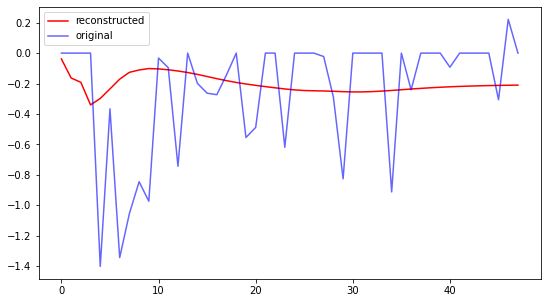

In [47]:
a = 0
b = 0

plt.figure(figsize=(9,5))
plt.plot(lstm_reconstruc_test[a][:,b], label='reconstructed', c='red')
plt.plot(processed_X_test[a][:,b], c='blue', label='original', alpha=0.6)
plt.legend()

In [48]:
def imputed_vae_data(X_train, X_test, reconstruc_train, reconstruc_test):
  
    X_train_imputed = np.empty([X_train.shape[0], X_train.shape[1], X_train.shape[2]])
    X_test_imputed = np.empty([X_test.shape[0], X_test.shape[1], X_test.shape[2]])


    # Impute original with reconstruction

    for i in range(X_train.shape[0]):
        for j in range(X_train.shape[1]):
            for k in range(X_train.shape[2]):
                if np.isnan(X_train[i,j,k]):
                    X_train_imputed[i,j,k] = reconstruc_train[i,j,k]
                else:
                    X_train_imputed[i,j,k] = X_train[i,j,k]


    for i in range(X_test.shape[0]):
        for j in range(X_test.shape[1]):
            for k in range(X_test.shape[2]):
                if np.isnan(X_test[i,j,k]):
                    X_test_imputed[i,j,k] = reconstruc_test[i,j,k]
                else:
                    X_test_imputed[i,j,k] = X_test[i,j,k]

    return X_train_imputed, X_test_imputed

In [49]:
lstm_X_train_imputed, lstm_X_test_imputed = imputed_vae_data(X_train, X_test, lstm_reconstruc_train, lstm_reconstruc_test)

In [50]:
def readm_preprocessing(X_train_imputed, X_test_imputed, y_train, y_test):
    readm_X_train = np.empty([X_train_imputed.shape[0], X_train_imputed.shape[1], X_train_imputed.shape[2]])
    readm_X_test = np.empty([X_test_imputed.shape[0], X_test_imputed.shape[1], X_test_imputed.shape[2]])

    for i in range(X_train_imputed.shape[0]):
        for j in range(X_train_imputed.shape[1]):
            for k in range(X_train_imputed.shape[2]):
                readm_X_train[i,j,k] = X_train_imputed[i,j,k]



    for i in range(X_test_imputed.shape[0]):
        for j in range(X_test_imputed.shape[1]):
            for k in range(X_test_imputed.shape[2]):
                readm_X_test[i,j,k] = X_test_imputed[i,j,k]



    readm_y_train = y_train['readmission']
    readm_y_test = y_test['readmission']


    rm_idx_train = []
    rm_idx_test = []


    for i in range(readm_X_train.shape[0]):
        if np.isnan(y_train['readmission'].values[i]) or y_train['mortality'].values[i] == 1:
            rm_idx_train.append(i)

    for i in range(readm_X_test.shape[0]):
        if np.isnan(y_test['readmission'].values[i]) or y_train['mortality'].values[i] == 1:
            rm_idx_test.append(i)

    readm_X_train = np.delete(readm_X_train, rm_idx_train, 0)
    readm_y_train = np.delete(np.array(readm_y_train), rm_idx_train, 0)

    readm_X_test = np.delete(readm_X_test, rm_idx_test, 0)
    readm_y_test = np.delete(np.array(readm_y_test), rm_idx_test, 0)

    #print(readm_X_train.shape)
    #print(readm_y_train.shape)

    #print(readm_X_test.shape)
    #print(readm_y_test.shape)

    #print(np.where(readm_y_train == 1))
    #print(np.where(readm_y_test == 1))  
    return readm_X_train, readm_X_test, readm_y_train, readm_y_test

In [51]:
def mortality_preprocessing(X_train_imputed, X_test_imputed, y_train, y_test):
    # Processing Data for Mortality
    mortality_X_train = np.empty([X_train_imputed.shape[0], X_train_imputed.shape[1], X_train_imputed.shape[2]])
    mortality_X_test = np.empty([X_test_imputed.shape[0], X_test_imputed.shape[1], X_test_imputed.shape[2]])

    for i in range(X_train_imputed.shape[0]):
        for j in range(X_train_imputed.shape[1]):
            for k in range(X_train_imputed.shape[2]):
                mortality_X_train[i,j,k] = X_train_imputed[i,j,k]


    for i in range(X_test_imputed.shape[0]):
        for j in range(X_test_imputed.shape[1]):
            for k in range(X_test_imputed.shape[2]):
                mortality_X_test[i,j,k] = X_test_imputed[i,j,k]

    mortality_y_train = y_train['mortality']
    mortality_y_test = y_test['mortality']


    #print(np.where(mortality_y_train == 1))
    #print(np.where(mortality_y_test == 1))
    return mortality_X_train, mortality_X_test, mortality_y_train, mortality_y_test

In [52]:
def los_preprocessing(X_train_imputed, X_test_imputed, y_train, y_test):
    # Processing Data for Length of Stay
    los_X_train = np.empty([X_train_imputed.shape[0], X_train_imputed.shape[1], X_train_imputed.shape[2]])
    los_X_test = np.empty([X_test_imputed.shape[0], X_test_imputed.shape[1], X_test_imputed.shape[2]])

    for i in range(X_train_imputed.shape[0]):
        for j in range(X_train_imputed.shape[1]):
            for k in range(X_train_imputed.shape[2]):
                los_X_train[i,j,k] = X_train_imputed[i,j,k]


    for i in range(X_test_imputed.shape[0]):
        for j in range(X_test_imputed.shape[1]):
            for k in range(X_test_imputed.shape[2]):
                los_X_test[i,j,k] = X_test_imputed[i,j,k]

                
    los_y_train = y_train['length_of_stay']
    los_y_test = y_test['length_of_stay']
    
    rm_idx_train = []
    rm_idx_test = []


    for i in range(los_X_train.shape[0]):
        if los_y_train.values[i] < 0:
            rm_idx_train.append(i)

    for i in range(los_X_test.shape[0]):
        if los_y_test.values[i] < 0:
            rm_idx_test.append(i)

    los_X_train = np.delete(los_X_train, rm_idx_train, 0)
    los_y_train = np.delete(np.array(los_y_train), rm_idx_train, 0)

    los_X_test = np.delete(los_X_test, rm_idx_test, 0)
    los_y_test = np.delete(np.array(los_y_test), rm_idx_test, 0)
    
          
    los_y_train = (los_y_train - np.full(len(los_y_train), np.mean(los_y_train))) / np.std(los_y_train)
    
    los_y_test = (los_y_test - np.full(len(los_y_test), np.mean(los_y_test))) / np.std(los_y_test)
  

    return los_X_train, los_X_test, los_y_train, los_y_test

In [53]:
# Readmission data for each method
readm_mean_X_train, readm_mean_X_test, readm_mean_y_train, readm_mean_y_test = readm_preprocessing(X_train_mean_imputed, 
                                                                               X_test_mean_imputed, y_train, y_test)
readm_lstm_X_train, readm_lstm_X_test, readm_lstm_y_train, readm_lstm_y_test = readm_preprocessing(lstm_X_train_imputed, 
                                                                           lstm_X_test_imputed, y_train, y_test)




# Mortality data for each method
mortality_mean_X_train, mortality_mean_X_test, mortality_mean_y_train, mortality_mean_y_test = mortality_preprocessing(X_train_mean_imputed, 
                                                                               X_test_mean_imputed, y_train, y_test)
mortality_lstm_X_train, mortality_lstm_X_test, mortality_lstm_y_train, mortality_lstm_y_test = mortality_preprocessing(lstm_X_train_imputed, 
                                                                           lstm_X_test_imputed, y_train, y_test)



# Length of stay data for each method
los_mean_X_train, los_mean_X_test, los_mean_y_train, los_mean_y_test = los_preprocessing(X_train_mean_imputed, 
                                                                               X_test_mean_imputed, y_train, y_test)
los_lstm_X_train, los_lstm_X_test, los_lstm_y_train, los_lstm_y_test = los_preprocessing(lstm_X_train_imputed, 
                                                                           lstm_X_test_imputed, y_train, y_test)



In [54]:
# LSTM Classification Model

es = EarlyStopping(patience=20, verbose=1, min_delta=0.0001, monitor='val_auc', mode='auto', restore_best_weights=True)

class_model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(64, activation='tanh', return_sequences=True),
  tf.keras.layers.LSTM(64, activation='tanh', return_sequences=True),
  tf.keras.layers.LSTM(64, activation='tanh'),
  tf.keras.layers.Dense(1, activation='sigmoid'),
])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-6)

class_model.compile(optimizer=optimizer, loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.AUC(), tf.keras.metrics.AUC(curve='PR'), 
                      tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [55]:
# LSTM Regression Model

es = EarlyStopping(patience=10, verbose=1, min_delta=0.0001, monitor='val_loss', mode='auto', restore_best_weights=True)

reg_model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(64, activation='tanh', return_sequences=True),
  tf.keras.layers.LSTM(64, activation='tanh', return_sequences=True),
  tf.keras.layers.LSTM(64, activation='tanh'),
  tf.keras.layers.Dense(1, activation='relu'),
])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

reg_model.compile(optimizer=optimizer, loss=tf.keras.losses.MeanSquaredError(), metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [56]:
def train_eval_pred_model(model, batch_size, epochs, X_train, X_test, y_train, y_test):
    hist = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=2, callbacks=[es])
    
    predictions = model.predict(X_test, batch_size=batch_size)

    metrics = model.evaluate(X_test, y_test, batch_size=batch_size)
    
    return model, predictions

In [ ]:
# Mean Imputation
mean_readm_model, mean_readm_preds = train_eval_pred_model(class_model, 2, 200, readm_mean_X_train, readm_mean_X_test,
                                                      readm_mean_y_train, readm_mean_y_test)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

print(confusion_matrix(readm_mean_y_test, np.where(mean_readm_preds < 0.2, 0, 1)) / len(readm_mean_y_test))

In [ ]:
mean_mort_model, mean_mort_preds = train_eval_pred_model(class_model, 2, 200, mortality_mean_X_train, mortality_mean_X_test,
                                                          mortality_mean_y_train, mortality_mean_y_test)

In [ ]:
print(confusion_matrix(mortality_mean_y_test, np.where(mean_mort_preds < 0.5, 0, 1)) / len(mortality_mean_y_test))

In [ ]:
mean_los_model, mean_los_preds  = train_eval_pred_model(reg_model, 1, 200, los_mean_X_train, los_mean_X_test, los_mean_y_train, los_mean_y_test)

In [ ]:


los_mean_y_test_std = np.subtract(los_mean_y_test, np.repeat(np.mean(los_mean_y_test), len(los_mean_y_test))) / np.std(los_mean_y_test)

fig, ax = plt.subplots()
ax.scatter(los_mean_y_test_std, mean_los_preds, s=25, zorder=10)


lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

plt.show()

In [63]:
# lstm-vae
lstm_readm_model, lstm_readm_preds  = train_eval_pred_model(class_model, 2, 200, readm_lstm_X_train, readm_lstm_X_test,
                                        readm_lstm_y_train, readm_lstm_y_test)

Epoch 1/200
7197/7197 - 142s - loss: 0.4602 - auc: 0.5791 - auc_1: 0.1956 - precision: 0.1509 - recall: 0.0070 - val_loss: 0.4310 - val_auc: 0.5623 - val_auc_1: 0.1670 - val_precision: 0.0385 - val_recall: 0.0019 - 142s/epoch - 20ms/step
Epoch 2/200
7197/7197 - 139s - loss: 0.4407 - auc: 0.5863 - auc_1: 0.1973 - precision: 0.1452 - recall: 0.0040 - val_loss: 0.4239 - val_auc: 0.5683 - val_auc_1: 0.1690 - val_precision: 0.0588 - val_recall: 0.0019 - 139s/epoch - 19ms/step
Epoch 3/200
7197/7197 - 138s - loss: 0.4366 - auc: 0.5890 - auc_1: 0.1989 - precision: 0.1667 - recall: 0.0035 - val_loss: 0.4206 - val_auc: 0.5694 - val_auc_1: 0.1693 - val_precision: 0.0625 - val_recall: 0.0019 - 138s/epoch - 19ms/step
Epoch 4/200
7197/7197 - 140s - loss: 0.4344 - auc: 0.5906 - auc_1: 0.2000 - precision: 0.2051 - recall: 0.0035 - val_loss: 0.4179 - val_auc: 0.5740 - val_auc_1: 0.1709 - val_precision: 0.0714 - val_recall: 0.0019 - 140s/epoch - 19ms/step
Epoch 5/200
7197/7197 - 139s - loss: 0.4329 - au

In [64]:
lstm_mort_model, lstm_mort_preds  = train_eval_pred_model(class_model, 2, 200, mortality_lstm_X_train, mortality_lstm_X_test,
                                       mortality_lstm_y_train, mortality_lstm_y_test)

Epoch 1/200
10076/10076 - 214s - loss: 0.2230 - auc: 0.8616 - auc_1: 0.5531 - precision: 0.8898 - recall: 0.1726 - val_loss: 0.2245 - val_auc: 0.8630 - val_auc_1: 0.5312 - val_precision: 0.7443 - val_recall: 0.2646 - 214s/epoch - 21ms/step
Epoch 2/200
10076/10076 - 205s - loss: 0.2064 - auc: 0.8792 - auc_1: 0.5885 - precision: 0.8082 - recall: 0.3097 - val_loss: 0.2212 - val_auc: 0.8686 - val_auc_1: 0.5397 - val_precision: 0.7083 - val_recall: 0.3091 - 205s/epoch - 20ms/step
Epoch 3/200
10076/10076 - 205s - loss: 0.2030 - auc: 0.8840 - auc_1: 0.5971 - precision: 0.7951 - recall: 0.3217 - val_loss: 0.2198 - val_auc: 0.8729 - val_auc_1: 0.5446 - val_precision: 0.7048 - val_recall: 0.3232 - 205s/epoch - 20ms/step
Epoch 4/200
10076/10076 - 204s - loss: 0.2009 - auc: 0.8862 - auc_1: 0.6023 - precision: 0.7908 - recall: 0.3389 - val_loss: 0.2183 - val_auc: 0.8729 - val_auc_1: 0.5472 - val_precision: 0.7474 - val_recall: 0.2929 - 204s/epoch - 20ms/step
Epoch 5/200


KeyboardInterrupt: 

In [ ]:
lstm_los_model, lstm_los_preds = train_eval_pred_model(reg_model, 1, 200, los_lstm_X_train, los_lstm_X_test, los_lstm_y_train, los_lstm_y_test)

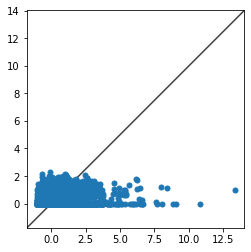

In [62]:


los_lstm_y_test_std = np.subtract(los_lstm_y_test, np.repeat(np.mean(los_lstm_y_test), len(los_lstm_y_test))) / np.std(los_lstm_y_test)

fig, ax = plt.subplots()
ax.scatter(los_lstm_y_test_std, lstm_los_preds, s=25, zorder=10)


lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

plt.show()

In [65]:
# Implementing Logistic Regression Model


from sklearn.linear_model import LogisticRegression 
from sklearn import metrics

# Implementing Logistic Regression Model
def train_test_lr_model(X_train, X_test, y_train, y_test): 
    
    lr_model = LogisticRegression(random_state=random_seed, max_iter=10e6)
    
    lr_model.fit(X_train, y_train)
    
    preds = lr_model.predict_proba(X_test)
    
    auroc = metrics.roc_auc_score(y_test, preds[:,1])
    print("auroc: ", auroc, "\n")
    
    precision, recall, thresholds = metrics.precision_recall_curve(y_test, preds[:,1])
    
    auprc = metrics.auc(recall, precision)
    print("auprc: ", auprc, "\n")


In [72]:
from sklearn.linear_model import Lasso
from sklearn import metrics

# Implementing Linear Regression Model with L1 regularization
def train_test_linear_model(X_train, X_test, y_train, y_test): 
    
    lr_model = Lasso(random_state=random_seed, max_iter=10e6)
    
    lr_model.fit(X_train, y_train)
    
    preds = lr_model.predict(X_test)
    
    mse = metrics.mean_squared_error(y_test, preds)
    print("mse: ", mse, "\n")
    
    mae = metrics.mean_absolute_error(y_test, preds)

    print("mae: ", mae, "\n")


In [68]:
# LR lstm readmission


readm_lstm_X_train_2d = readm_lstm_X_train.reshape((readm_lstm_X_train.shape[0], readm_lstm_X_train.shape[1]*readm_lstm_X_train.shape[2]))

readm_lstm_X_test_2d = readm_lstm_X_test.reshape((readm_lstm_X_test.shape[0], readm_lstm_X_test.shape[1]*readm_lstm_X_test.shape[2]))

train_test_lr_model(readm_lstm_X_train_2d, readm_lstm_X_test_2d, readm_lstm_y_train, readm_lstm_y_test)


auroc:  0.560997804276486 

auprc:  0.16098736920044343 



In [69]:
# LR lstm ihm



mortality_lstm_X_train_2d = mortality_lstm_X_train.reshape((mortality_lstm_X_train.shape[0],
                                                          mortality_lstm_X_train.shape[1]*mortality_lstm_X_train.shape[2]))

mortality_lstm_X_test_2d = mortality_lstm_X_test.reshape((mortality_lstm_X_test.shape[0],
                                                     mortality_lstm_X_test.shape[1]*mortality_lstm_X_test.shape[2]))

train_test_lr_model(mortality_lstm_X_train_2d, mortality_lstm_X_test_2d, mortality_lstm_y_train, mortality_lstm_y_test)



auroc:  0.8027163995801716 

auprc:  0.39884463204882636 



In [73]:
# Linear regression lstm los


los_lstm_X_train_2d = los_lstm_X_train.reshape((los_lstm_X_train.shape[0], los_lstm_X_train.shape[1]*los_lstm_X_train.shape[2]))

los_lstm_X_test_2d = los_lstm_X_test.reshape((los_lstm_X_test.shape[0], los_lstm_X_test.shape[1]*los_lstm_X_test.shape[2]))

train_test_linear_model(los_lstm_X_train_2d, los_lstm_X_test_2d, los_lstm_y_train, los_lstm_y_test)





mse:  1.0 

mae:  0.6456541924088668 



In [92]:
import xgboost as xgb

# Implementing XGBoost model
def train_test_XGBoost_class(X_train, X_test, y_train, y_test):
    xg_class = xgb.XGBClassifier(objective ='binary:logistic', nthread=1, learning_rate = 0.2,
                    max_depth = 12, alpha = 12, n_estimators = 35, use_label_encoder = False, eval_metric='logloss')
    
    xg_class.fit(X_train,y_train)

    preds = xg_class.predict_proba(X_test)
    
    auroc = metrics.roc_auc_score(y_test, preds[:,1])
    print("auroc: ", auroc, "\n")
    
    precision, recall, thresholds = metrics.precision_recall_curve(y_test, preds[:,1])
    
    auprc = metrics.auc(recall, precision)
    print("auprc: ", auprc, "\n")
    

     
   


In [93]:
def train_test_XGBoost_reg(X_train, X_test, y_train, y_test):
    xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', nthread=1, learning_rate = 0.15,
                    max_depth = 12, alpha = 12, n_estimators = 30)
    
    xg_reg.fit(X_train,y_train)

    preds = xg_reg.predict(X_test)
    
    mse = metrics.mean_squared_error(y_test, preds)
    print("mse: ", mse, "\n")
    
    mae = metrics.mean_absolute_error(y_test, preds)
    print("mae: ", mae, "\n")
    
   

In [94]:
# XGB lstm readmission


readm_lstm_X_train_2d = readm_lstm_X_train.reshape((readm_lstm_X_train.shape[0], readm_lstm_X_train.shape[1]*readm_lstm_X_train.shape[2]))

readm_lstm_X_test_2d = readm_lstm_X_test.reshape((readm_lstm_X_test.shape[0], readm_lstm_X_test.shape[1]*readm_lstm_X_test.shape[2]))

train_test_XGBoost_class(readm_lstm_X_train_2d, readm_lstm_X_test_2d, readm_lstm_y_train, readm_lstm_y_test)


auroc:  0.5612784397147311 

auprc:  0.1737035514565878 



In [95]:
# LR lstm ihm



mortality_lstm_X_train_2d = mortality_lstm_X_train.reshape((mortality_lstm_X_train.shape[0],
                                                          mortality_lstm_X_train.shape[1]*mortality_lstm_X_train.shape[2]))

mortality_lstm_X_test_2d = mortality_lstm_X_test.reshape((mortality_lstm_X_test.shape[0],
                                                     mortality_lstm_X_test.shape[1]*mortality_lstm_X_test.shape[2]))

train_test_XGBoost_class(mortality_lstm_X_train_2d, mortality_lstm_X_test_2d, mortality_lstm_y_train, mortality_lstm_y_test)



auroc:  0.8858862485900475 

auprc:  0.5702378249529821 



In [96]:
# Linear regression lstm los


los_lstm_X_train_2d = los_lstm_X_train.reshape((los_lstm_X_train.shape[0], los_lstm_X_train.shape[1]*los_lstm_X_train.shape[2]))

los_lstm_X_test_2d = los_lstm_X_test.reshape((los_lstm_X_test.shape[0], los_lstm_X_test.shape[1]*los_lstm_X_test.shape[2]))

train_test_XGBoost_reg(los_lstm_X_train_2d, los_lstm_X_test_2d, los_lstm_y_train, los_lstm_y_test)





mse:  0.8700617730395375 

mae:  0.5728182847154878 



In [81]:
los_mean_X_train_2d = los_mean_X_train.reshape((los_mean_X_train.shape[0], los_mean_X_train.shape[1]*los_mean_X_train.shape[2]))

los_mean_X_test_2d = los_mean_X_test.reshape((los_mean_X_test.shape[0], los_mean_X_test.shape[1]*los_mean_X_test.shape[2]))

In [87]:
# cross-validation xgb regression

from sklearn.model_selection import KFold


# Grid search for XGB
depths = [12, 15]
n_ests = [30, 35]
lrs = [0.1, 0.2]
alphas = [12, 14]


mse_dict = {}
mae_dict = {}

for depth in depths:
    for n_est in n_ests:
        for lr in lrs:
            for alpha in alphas:

                mse_dict[(depth, n_est, lr, alpha)] = 0
                mae_dict[(depth, n_est, lr, alpha)] = 0

k = 4


kf = KFold(n_splits=k)

for train_index, test_index in kf.split(los_mean_X_train_2d, los_mean_y_train):
    X_train_kf, X_test_kf = los_mean_X_train_2d[train_index], los_mean_X_train_2d[test_index]
    y_train_kf, y_test_kf = los_mean_y_train[train_index], los_mean_y_train[test_index]
  

    for depth in depths:
        for n_est in n_ests:
            for lr in lrs:
                for alpha in alphas:
                    
                    
                    xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', nthread=1, learning_rate = lr,
                    max_depth = depth, alpha = alpha, n_estimators = n_est)
    
                    xg_reg.fit(X_train_kf,y_train_kf)

                    preds = xg_reg.predict(X_test_kf)

                    cur_mse = metrics.mean_squared_error(y_test_kf, preds)


                    cur_mae = metrics.mean_absolute_error(y_test_kf, preds)

                    mse_dict[(depth, n_est, lr, alpha)] += cur_mse / k 
                    mae_dict[(depth, n_est, lr, alpha)] += cur_mae / k


best_mse = 100
best_mae = 100

for key, model_mse in mse_dict.items():
    if model_mse < best_mse:
        best_mse = model_mse
        best_depth = key[0]
        best_n_est = key[1]
        best_learning_rate = key[2]
        best_alpha = key[3]


# Finding the best parameters n for mse
print('Best mse:', best_mse, '\n')
print('depth:', best_depth, '\n')
print('n_est:', best_n_est, '\n')
print('learning rate: ', best_learning_rate, '\n')
print('alpha: ', best_alpha, '\n')

for key, model_mae in mae_dict.items():
    if model_mae < best_mae:
        best_mae = model_mae
        best_depth = key[0]
        best_n_est = key[1]
        best_learning_rate = key[2]
        best_alpha = key[3]
  
 # Finding the best parameters n for mae
print('Best mae:', best_mae, '\n')
print('depth:', best_depth, '\n')
print('n_est:', best_n_est, '\n')
print('learning rate: ', best_learning_rate, '\n')
print('alpha: ', best_alpha, '\n')


Best mse: 0.8739469989495194 

depth: 12 

n_est: 30 

learning rate:  0.1 

alpha:  12 

Best mae: 0.4943113124019164 

depth: 10 

n_est: 30 

learning rate:  0.2 

alpha:  12 

